# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


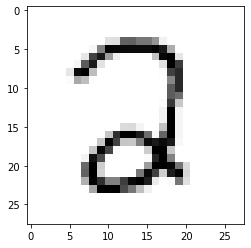

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2217756219190365
train accuracy is: 0.7614755466533133, test accuracy is 0.7711693548387096


Epoch 10 Loss 0.08022369667173662
train accuracy is: 0.9222166583208146, test accuracy is 0.9314516129032258


Epoch 20 Loss 0.052335294142029046
train accuracy is: 0.9465030879652813, test accuracy is 0.954133064516129


Epoch 30 Loss 0.042162971281596726
train accuracy is: 0.9538474378234018, test accuracy is 0.9616935483870968


Epoch 40 Loss 0.036892874316805914
train accuracy is: 0.9591887831747622, test accuracy is 0.9667338709677419


Epoch 50 Loss 0.0335707209399182
train accuracy is: 0.9615256217659823, test accuracy is 0.9682459677419355


Epoch 60 Loss 0.0312330643481317
train accuracy is: 0.9641962944416625, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.029462445051453505
train accuracy is: 0.9663662159906526, test accuracy is 0.9707661290322581


Epoch 80 Loss 0.028061885436360113
train accuracy is: 0.9674511767651477, test accuracy is 0.9717741935483871


Epoch 90 Loss 0.026900158402065916
train accuracy is: 0.9691203471874479, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.025928660412106536
train accuracy is: 0.970288766483058, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.025074711591695997
train accuracy is: 0.971039893173093, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.0243320503561446
train accuracy is: 0.971957936905358, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.02365451397155088
train accuracy is: 0.9727090635953931, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.023039736540221237
train accuracy is: 0.9735436488065431, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.022465408202455253
train accuracy is: 0.9743782340176932, test accuracy is 0.9712701612903226


Epoch 160 Loss 0.021932627632055193
train accuracy is: 0.9754631947921882, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.021434353496185773
train accuracy is: 0.9760474044399933, test accuracy is 0.9722782258064516


Epoch 180 Loss 0.020959828452889816
train accuracy is: 0.9763812385244534, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.020513943116155665
train accuracy is: 0.9768819896511434, test accuracy is 0.9727822580645161


Epoch 200 Loss 0.020087429648220505
train accuracy is: 0.9776331163411784, test accuracy is 0.9732862903225806


Epoch 210 Loss 0.019694601718675514
train accuracy is: 0.9782173259889835, test accuracy is 0.9732862903225806


Epoch 220 Loss 0.019304883086048892
train accuracy is: 0.9791353697212486, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.018935539642407188
train accuracy is: 0.9797195793690536, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.01858045441638737
train accuracy is: 0.9801368719746286, test accuracy is 0.9742943548387096


0.006262562057950097

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23051178549392018
train accuracy is: 0.714822233350025, test accuracy is 0.7217741935483871


Epoch 10 Loss 0.1041274377424143
train accuracy is: 0.9030211984643632, test accuracy is 0.9107862903225806


Epoch 20 Loss 0.07969779543175226
train accuracy is: 0.9258888332498748, test accuracy is 0.9354838709677419


Epoch 30 Loss 0.0683559956857523
train accuracy is: 0.9362376898681355, test accuracy is 0.9430443548387096


Epoch 40 Loss 0.061574399344275034
train accuracy is: 0.9429978300784511, test accuracy is 0.9501008064516129


Epoch 50 Loss 0.056984208769387396
train accuracy is: 0.9465865464863963, test accuracy is 0.954133064516129


Epoch 60 Loss 0.053635097848524646
train accuracy is: 0.9487564680353864, test accuracy is 0.9551411290322581


Epoch 70 Loss 0.051063049573436145
train accuracy is: 0.9505090969788015, test accuracy is 0.9571572580645161


Epoch 80 Loss 0.04901165465892263
train accuracy is: 0.9516775162744117, test accuracy is 0.9576612903225806


Epoch 90 Loss 0.04732759423288144
train accuracy is: 0.9535136037389418, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.04591285262340436
train accuracy is: 0.9543481889500918, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.04470335886904554
train accuracy is: 0.9553496912034719, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.043652923549006774
train accuracy is: 0.9561842764146219, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.042731037643152774
train accuracy is: 0.9567684860624269, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.041910971378428516
train accuracy is: 0.957185778668002, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04117610485154637
train accuracy is: 0.957603071273577, test accuracy is 0.9632056451612904


Epoch 160 Loss 0.04051260917477139
train accuracy is: 0.9584376564847271, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.03990854091468005
train accuracy is: 0.9584376564847271, test accuracy is 0.9637096774193549


Epoch 180 Loss 0.03935631170086168
train accuracy is: 0.9591887831747622, test accuracy is 0.9632056451612904


Epoch 190 Loss 0.03884826244485665
train accuracy is: 0.9595226172592222, test accuracy is 0.9637096774193549


Epoch 200 Loss 0.03837828486476876
train accuracy is: 0.9600233683859122, test accuracy is 0.9637096774193549


Epoch 210 Loss 0.037942711265662565
train accuracy is: 0.9602737439492572, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.03753612638328378
train accuracy is: 0.9605241195126022, test accuracy is 0.9647177419354839


Epoch 230 Loss 0.037156522955863906
train accuracy is: 0.9611917876815222, test accuracy is 0.9647177419354839


Epoch 240 Loss 0.036801058557830196
train accuracy is: 0.9613587047237523, test accuracy is 0.9647177419354839


0.03307153784348908

### Comparing results of NN and LR

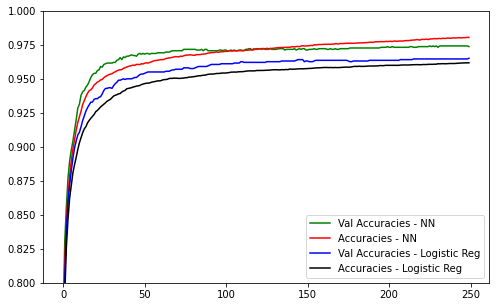

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

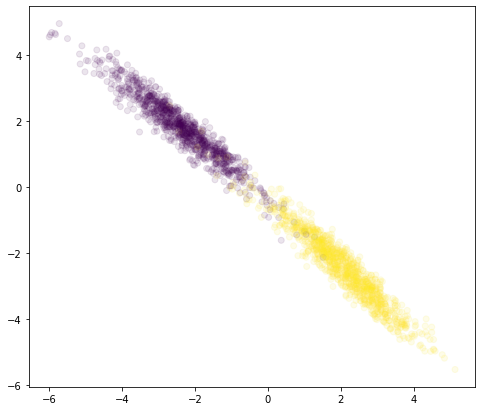

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

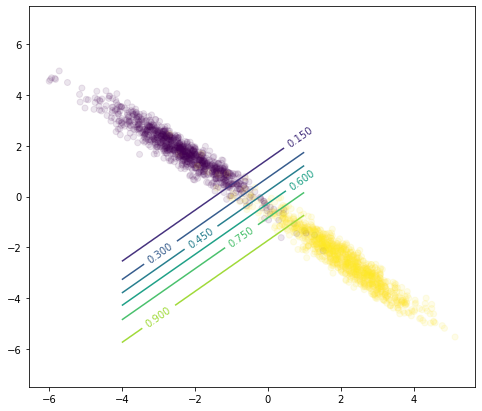

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );